In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix,
                             accuracy_score)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten,
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, accuracy_score)
# Base Libraries
from tensorflow.keras.applications import  VGG19,EfficientNetB0,VGG16,InceptionV3,ResNet50,EfficientNetB3,EfficientNetV2B0
from tensorflow.keras.models import Model
from keras.applications.vgg16 import preprocess_input
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Transformation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.pipeline import Pipeline
# Feature Selection


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train2=os.listdir(r"/content/drive/MyDrive/skin6/train")


In [ ]:
train2

['Normal',
 'Psoriasis pictures Lichen Planus and related diseases',
 'vitiligo',
 'Melanoma Skin Cancer Nevi and Moles',
 'Acne and Rosacea Photos',
 'Eczema Photos',
 'Tinea Ringworm Candidiasis and other Fungal Infections']

In [ ]:
cat=sorted(train2)
cat

['Acne and Rosacea Photos',
 'Eczema Photos',
 'Melanoma Skin Cancer Nevi and Moles',
 'Normal',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'vitiligo']

In [ ]:
def data_dictionary():
    path_train=r"/content/drive/MyDrive/skin6/train"
    # path_test="/kaggle/input/dermnet/train/"
    list_train=cat#os.listdir(path_train)
    # list_train1=cat2
    train_dictionary={"image_path":[],"target":[]}
    # test_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        path_disease_train=path_train+"/"+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j
            # if img_path_train!="/kaggle/input/skindatasets/skin/train/Normal/34.avif":
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(k)
        k+=1
    # for i in list_train1:
    #     path_disease_test=path_test+i
    #     image_list_test=os.listdir(path_disease_test)
    #     for j in image_list_test:
    #         img_path_train=path_disease_test+"/"+j
    #         train_dictionary["image_path"].append(img_path_train)
    #         train_dictionary['target'].append(4)
    train_df=pd.DataFrame(train_dictionary)
    return  train_df

In [ ]:
train=data_dictionary()


In [ ]:
print(train)

                                             image_path  target
0     /content/drive/MyDrive/skin6/train/Acne and Ro...       0
1     /content/drive/MyDrive/skin6/train/Acne and Ro...       0
2     /content/drive/MyDrive/skin6/train/Acne and Ro...       0
3     /content/drive/MyDrive/skin6/train/Acne and Ro...       0
4     /content/drive/MyDrive/skin6/train/Acne and Ro...       0
...                                                 ...     ...
8281  /content/drive/MyDrive/skin6/train/vitiligo/ro...       6
8282  /content/drive/MyDrive/skin6/train/vitiligo/ro...       6
8283  /content/drive/MyDrive/skin6/train/vitiligo/ro...       6
8284  /content/drive/MyDrive/skin6/train/vitiligo/ro...       6
8285  /content/drive/MyDrive/skin6/train/vitiligo/ro...       6

[8286 rows x 2 columns]


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8286 entries, 0 to 8285
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  8286 non-null   object
 1   target      8286 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 129.6+ KB


In [ ]:
import cv2
import os
import concurrent.futures

images = []
k = 0

# Resize images outside the loop
def resize_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (180, 180))
    return img

image_paths = [i for i in train['image_path']]

# Load images in parallel
with concurrent.futures.ThreadPoolExecutor() as executor:
    images = list(executor.map(resize_image, image_paths))
    print("0")

# Print progress
print(f"Loaded {len(images)} images")

# Now, you can continue processing the loaded images


0
Loaded 8286 images


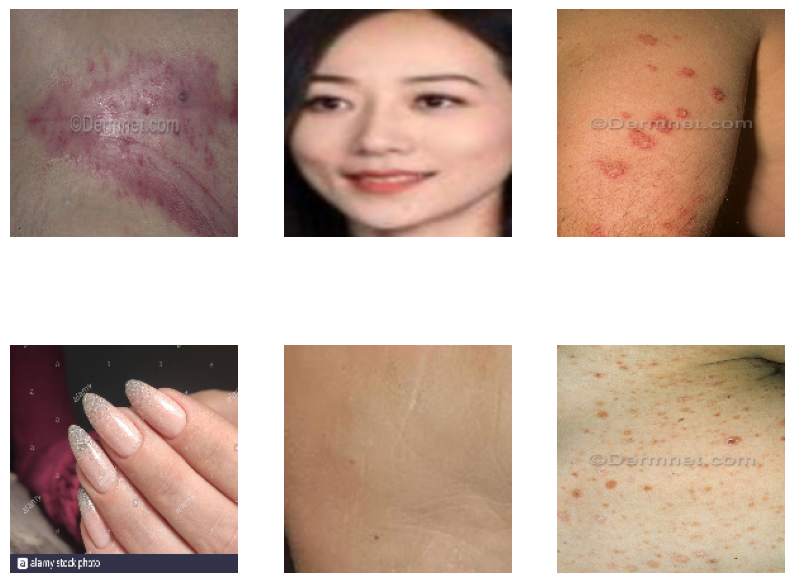

In [ ]:
# Create a list of example inputs to our Gradio demo
example_list = [image for image in random.sample(images, k=6)]

# Plot the images in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

for ax, img_array in zip(axes.ravel(), example_list):
    ax.imshow(img_array)
    ax.axis('off')

plt.show()

In [ ]:
label=train['target']

In [ ]:
label.shape

(8286,)

In [ ]:
len(label)

8286

In [ ]:
len(images)

8286

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=np.array(images)

In [ ]:
label=np.array(label)

In [ ]:
label.shape

(8286,)

In [ ]:
vgg_model = EfficientNetV2B0(weights = 'imagenet',  include_top = False, input_shape = (180, 180, 3))

In [ ]:
for layer in vgg_model.layers :
    layer.trainable = False

In [ ]:
vgg_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 rescaling_1 (Rescaling)     (None, 180, 180, 3)          0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, 180, 180, 3)          0         ['rescaling_1[0][0]']         
 tion)                                                                                            
                                                                                                  
 stem_conv (Conv2D)          (None, 90, 90, 32)           864       ['normalizatio

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense
from tensorflow.keras.regularizers import l1,l2

In [ ]:
model=Sequential([  Dense(200,activation='relu'),
                  Dropout(0.2),
                  Dense(170,activation='relu'),
                  Dropout(0.2),
                  Dense(7,activation='softmax'),
])

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
# kf = KFold(n_splits = 3)

In [ ]:
import keras
acc=[]
num_classes = 7
label = keras.utils.to_categorical(label, num_classes)

In [ ]:
label.shape

(8286, 7)

In [ ]:
for i in range(3):
    x_train,x_test, y_train, y_test=train_test_split(data, label, test_size=0.2,random_state = np.random.randint(1,1000, 1)[0])
    print(x_train.shape)
    # let's make all layers non-trainable
    for layer in vgg_model.layers :
        layer.trainable = False
    features_train=vgg_model.predict(x_train)
    features_test=vgg_model.predict(x_test)
    print(features_train.shape)
    num_train=x_train.shape[0]
    num_test=x_test.shape[0]
    print(num_train)
    print(num_test)
    x_test=features_test.reshape(num_test,-1)
    x_train=features_train.reshape(num_train,-1)
    print(x_train.shape)
    print(x_train.shape)
    #x_train,x_valid,y_train,y_valid= train_test_split(x_train, y_train, test_size=0.1,random_state = np.random.randint(1,1000, 1)[0])
    # history=model.fit(x_train,y_train,epochs=15,batch_size=32,verbose=1)
    # model.evaluate(x_test,y_test)

(6628, 180, 180, 3)
52/52 [==============================] - 2s 43ms/step
(6628, 6, 6, 1280)
6628
1658
(6628, 46080)
(6628, 46080)
(6628, 180, 180, 3)
52/52 [==============================] - 2s 29ms/step
(6628, 6, 6, 1280)
6628
1658
(6628, 46080)
(6628, 46080)
(6628, 180, 180, 3)
52/52 [==============================] - 2s 29ms/step
(6628, 6, 6, 1280)
6628
1658
(6628, 46080)
(6628, 46080)


In [ ]:
x_train.shape,y_train.shape

((6628, 46080), (6628, 7))

In [ ]:
history = model.fit(x_train, y_train, epochs=25)

Epoch 1/25
208/208 [==============================] - 4s 9ms/step - loss: 1.1376 - accuracy: 0.6073
Epoch 2/25
208/208 [==============================] - 2s 8ms/step - loss: 0.7251 - accuracy: 0.7265
Epoch 3/25
208/208 [==============================] - 1s 7ms/step - loss: 0.5837 - accuracy: 0.7827
Epoch 4/25
208/208 [==============================] - 1s 7ms/step - loss: 0.4576 - accuracy: 0.8366
Epoch 5/25
208/208 [==============================] - 1s 7ms/step - loss: 0.3643 - accuracy: 0.8693
Epoch 6/25
208/208 [==============================] - 1s 7ms/step - loss: 0.2922 - accuracy: 0.8971
Epoch 7/25
208/208 [==============================] - 1s 7ms/step - loss: 0.2215 - accuracy: 0.9234
Epoch 8/25
208/208 [==============================] - 1s 7ms/step - loss: 0.2084 - accuracy: 0.9279
Epoch 9/25
208/208 [==============================] - 2s 8ms/step - loss: 0.2053 - accuracy: 0.9307
Epoch 10/25
208/208 [==============================] - 2s 8ms/step - loss: 0.1837 - accuracy: 0.9469

In [ ]:
model.save('keras_model.h5')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
y_pred=model.predict(x_test)

52/52 [==============================] - 0s 4ms/step


In [ ]:
y_pred2=np.argmax(y_pred, axis=1)
y_pred2

array([1, 3, 0, ..., 2, 0, 6])

In [ ]:
y_test=np.argmax(y_test, axis=1)

In [ ]:
y_test

array([4, 3, 4, ..., 2, 0, 6])

In [ ]:
confusion_matrix_result=confusion_matrix(y_test,y_pred2)

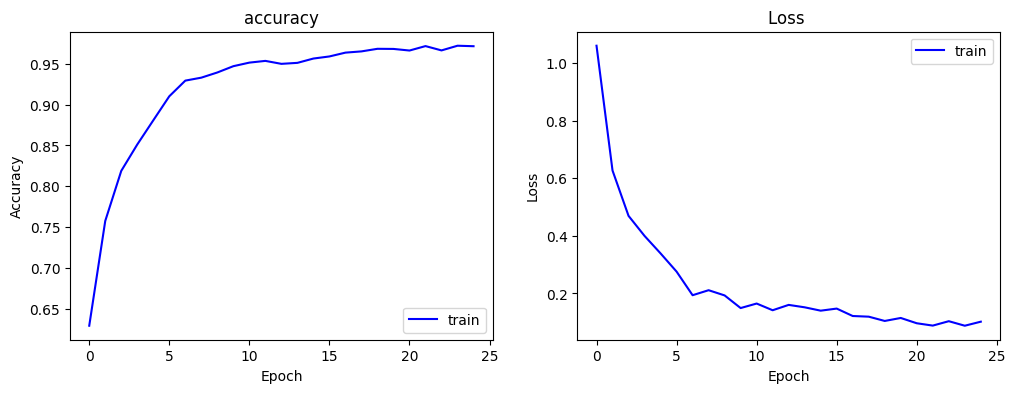

In [ ]:
train_accuracy = history.history['accuracy']
#val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(train_accuracy))
plt.figure(figsize=(12,4))
# Plotting the accuracy
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')

plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# Plotting the loss
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'b', label='Training loss')

plt.title('Loss ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

In [ ]:
confusion_matrix=classification_report(y_test,y_pred2)

In [ ]:
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       223
           1       0.74      0.60      0.67       251
           2       0.99      1.00      1.00       172
           3       0.98      0.89      0.93       151
           4       0.59      0.69      0.64       284
           5       0.63      0.66      0.65       244
           6       0.96      0.97      0.97       333

    accuracy                           0.80      1658
   macro avg       0.82      0.81      0.81      1658
weighted avg       0.81      0.80      0.80      1658



In [ ]:
import tensorflow as tf
import numpy as np
import cv2

def predict_skin_disease(image_path):
    # Load saved model
    model = tf.keras.models.load_model('6class.keras')
    img = cv2.imread(image_path)
    if img is None:return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (180, 180))
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img=np.array(img)
    print(img.shape)
    features_test=vgg_model.predict(img)
    num_test=img.shape[0]
    x_test=features_test.reshape(num_test,-1)
    # Load and preprocess image
    # img = np.expand_dims(img, axis=0)
    # Make prediction on preprocessed image
    pred = model.predict(x_test)[0]
    predicted_class = np.argmax(pred)

    return predicted_class


print(predict_skin_disease(r"/content/drive/MyDrive/download (6).jpeg"))

(1, 180, 180, 3)
1/1 [==============================] - 0s 54ms/step
6


In [ ]:
print(dic)